## Naive Bayes Classification

In [2]:
import numpy as np 
from sklearn import datasets
import matplotlib.pyplot as plt 

#### Gausian Distribution Formula

$$ f(x | \mu, \sigma) = \frac{1}{\sqrt{2\pi \sigma ^2}} e^{-\frac{(x - \mu)^2}{2\sigma^2}} $$


Where:
- $ f(x | \mu, \sigma ) $ is the probability density function,
- $ \mu $ is the mean,
- $ \sigma $ is the standard deviation,
- $ e $ is the base of the natural logarithm (Euler's number), and
- $ \pi $ is the mathematical constant pi.

In [3]:
class NaiveBayes:
    def fit(self, x, y):
        n_samples, n_features = x.shape 
        self._classes = np.unique(y)
        n_classes = len(self._classes)
        '''
        Consider x has three features and y has 2 classes 
        mean, var would be [[0,0,0]
                            [0,0,0]]
        priors would be [0,0]  
        '''
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        # For each class of y
        for idx, c in enumerate(self._classes):
            xc = x[y==c]             # Select rows where target(y) = selected class
            # Set column(selected class) of _mean as mean of selected rows of each feature
            self._mean[idx,:] = xc.mean(axis=0) 
            # Set column(selected class) of _var as variance of selected rows of each feature
            self._var[idx,:] = xc.var(axis=0)
            # Compute probability as no of rows of given class / total rows
            self._priors[idx] = xc.shape[0]/float(n_samples)
        
    def predict(self, x):
        ''' Predict y for each row of x '''
        y_pred = [self._predict(xi) for xi in x]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior + posterior
            posteriors.append(posterior)
        
        return self._classes[np.argmax(posteriors)]
    
    def _pdf(self, class_idx, x):
        '''Calculate Probability Density for given class using Gausian Distribution Formula'''
        
        # Retrieve calculated mean and var of given class
        mean = self._mean[class_idx]
        var = self._var[class_idx]

        # Using Above stated formula
        numerator=np.exp(-(x-mean) ** 2)/(2*var)
        denominator = np.sqrt(2*np.pi*var)
        return numerator/denominator

Train Data: 6400, Test Data: 1600


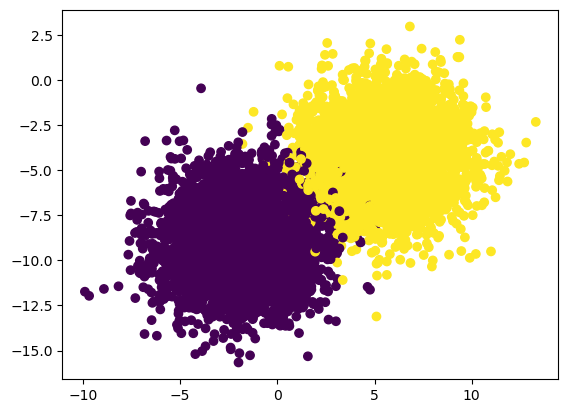

In [11]:
def train_test_split(x, y, ratio=0.8):
    x_test, y_test = x[int(ratio*len(x)):], y[int(ratio*len(y)):]
    x, y = x[:int(ratio*len(x))], y[:int(ratio*len(y))]
    return x,y,x_test,y_test

# x, y = datasets.make_classification( n_samples=10000, 
#         n_features=10, n_classes=2 ,random_state=123)

x, y = datasets.make_blobs( n_samples=8000, n_features=2,
      centers=2, cluster_std=2, random_state=40)
plt.scatter(x[:,0],x[:,1],c=y)

x, y, x_test, y_test = train_test_split(x,y)
print(f"Train Data: {len(x)}, Test Data: {len(x_test)}")

In [9]:
model = NaiveBayes()
model.fit(x, y)

In [10]:
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

y_pred = model.predict(x_test)
print("Train Accuracy :,", accuracy(y, model.predict(x)))
print("Test Accuracy :,", accuracy(y_test, y_pred))

Train Accuracy :, 0.9865
Test Accuracy :, 0.99


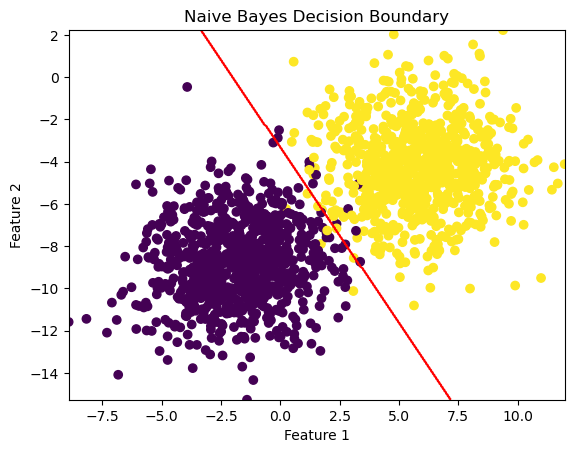

In [39]:
feature1, feature2 = x_test[:,0], x_test[:,1]

f1_values = np.linspace(min(feature1), max(feature1), 300)
f2_values = np.linspace(min(feature2), max(feature2), 300)
f1_mesh, f2_mesh = np.meshgrid(f1_values, f2_values)
points = np.c_[f1_mesh.ravel(), f2_mesh.ravel()]

probs = model.predict(points)
mesh = probs.reshape(f1_mesh.shape)

plt.contour(f1_mesh, f2_mesh, mesh, levels=[0.5], colors='red')
plt.scatter(feature1, feature2, c=y_test)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Naive Bayes Decision Boundary')
plt.show()